<h3 align="center">ЮЖНЫЙ ФЕДЕРАЛЬНЫЙ УНИВЕРСИТЕТ<br>
Институт математики, механики и компьютерных наук
имени И.И. Воровича<h3>
<p style="text-align:center; font-size:18px">ПРОЕКТНОЕ ЗАДАНИЕ<br>
«Обработка и анализ данных в Pandas»<br>
по курсу<br> «Технологии программирования и компьютерный практикум».<br></p>
<h4 align="center">Угрозы кибербезопасности</h4>
<div style="height=25px"></div>
<p style="text-align:center">ВЫПОЛНИЛИ: студенты группы МТ-МХ-1 1-го курса<br>
<b>Петин Константин<br>
<b>Хамзатов Рамзан</p>
<div style="height:30px"></div>
<p style="text-align:center">Ростов-на-Дону, 2025</p>

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

<span style="font-size:18px;">Рассмотрим датасет о кибератаках по всему миру по данным с 2015 по 2024 год(<a href="https://www.kaggle.com/code/sonawanelalitsunil/cybersecurity-threats-2015-2024-ml">ссылка на сайт с данными</a>). Данные представлены в файле csv, что позволяет сразу на сайте увидеть их структуру и содержимое. В таблице всего 10 столбцов: страна, год, тип атаки, отрасль, на которую производилась атака, финансовые потери в млн. $, число пострадавших пользователей, источник атаки, тип уязвимости безопасности, используемый защитный механизм, время за которое решили проблему.</span>

##  Рассмотрим данные в таблице 

In [2]:
df = pd.read_csv('Global_Cybersecurity_Threats_2015-2024.csv')
df.head()

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68


In [3]:
df.tail()

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
2995,UK,2021,Ransomware,Government,51.42,190694,Unknown,Social Engineering,Firewall,52
2996,Brazil,2023,SQL Injection,Telecommunications,30.28,892843,Hacker Group,Zero-day,VPN,26
2997,Brazil,2017,SQL Injection,IT,32.97,734737,Nation-state,Weak Passwords,AI-based Detection,30
2998,UK,2022,SQL Injection,IT,32.17,379954,Insider,Unpatched Software,Firewall,9
2999,Germany,2021,SQL Injection,Retail,48.20,480984,Unknown,Zero-day,VPN,64


 Проверим, нет ли проблем в данных

In [63]:
df.dtypes

Country                                 object
Year                                     int64
Attack Type                             object
Target Industry                         object
Financial Loss (in Million $)          float64
Number of Affected Users                 int64
Attack Source                           object
Security Vulnerability Type             object
Defense Mechanism Used                  object
Incident Resolution Time (in Hours)      int64
dtype: object

In [4]:
df.isnull().sum()

Country                                0
Year                                   0
Attack Type                            0
Target Industry                        0
Financial Loss (in Million $)          0
Number of Affected Users               0
Attack Source                          0
Security Vulnerability Type            0
Defense Mechanism Used                 0
Incident Resolution Time (in Hours)    0
dtype: int64

## 1. Какие индустрии больше всего подверглись кибератакам?

```value_counts``` - Возвращает число уникальных значений 

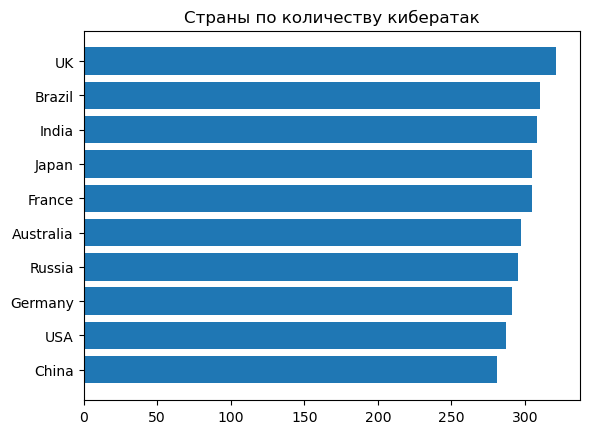

In [3]:
countries = df["Country"].value_counts(ascending=True)
plt.barh(countries.index, countries.values)
plt.title("Страны по количеству кибератак")

plt.show()
plt.close()


## 2. Какая индустрия подверглась самым большим финансовым потерям?

In [21]:
industries = pd.DataFrame([df["Target Industry"], df["Financial Loss (in Million $)"]])
industries

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
Target Industry,Education,Retail,IT,Telecommunications,IT,Retail,Telecommunications,Government,Banking,Healthcare,...,Telecommunications,Banking,Banking,Education,Government,Government,Telecommunications,IT,IT,Retail
Financial Loss (in Million $),80.53,62.19,38.65,41.44,74.41,98.24,33.26,59.23,16.88,69.14,...,65.16,28.14,60.14,54.98,58.6,51.42,30.28,32.97,32.17,48.2


In [47]:
df = pd.DataFrame({'Animal': ['Falcon', 'Falcon',
                             'Parrot', 'Parrot'],
                   'Max Speed': [380., 370., 24., 26.]})
print(df.groupby(['Animal']).sum())

        Max Speed
Animal           
Falcon      750.0
Parrot       50.0


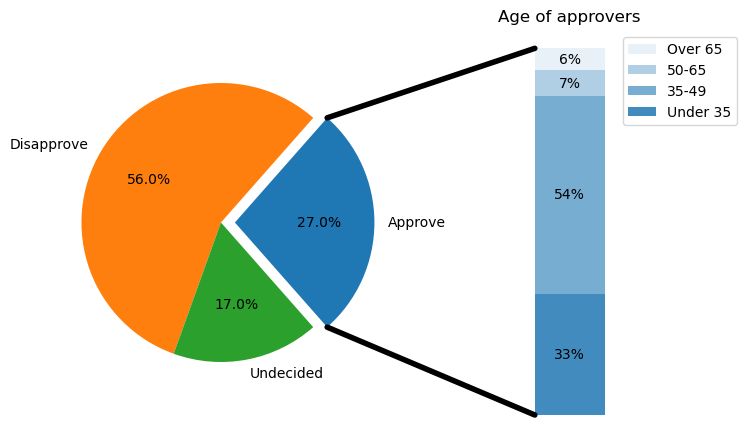

In [36]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.patches import ConnectionPatch

# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5))
fig.subplots_adjust(wspace=0)

# pie chart parameters
overall_ratios = [.27, .56, .17]
labels = ['Approve', 'Disapprove', 'Undecided']
explode = [0.1, 0, 0]
# rotate so that first wedge is split by the x-axis
angle = -180 * overall_ratios[0]
wedges, *_ = ax1.pie(overall_ratios, autopct='%1.1f%%', startangle=angle,
                     labels=labels, explode=explode)

# bar chart parameters
age_ratios = [.33, .54, .07, .06]
age_labels = ['Under 35', '35-49', '50-65', 'Over 65']
bottom = 1
width = .2

# Adding from the top matches the legend.
for j, (height, label) in enumerate(reversed([*zip(age_ratios, age_labels)])):
    bottom -= height
    bc = ax2.bar(0, height, width, bottom=bottom, color='C0', label=label,
                 alpha=0.1 + 0.25 * j)
    ax2.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')

ax2.set_title('Age of approvers')
ax2.legend()
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r
bar_height = sum(age_ratios)

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)

plt.show()

2.

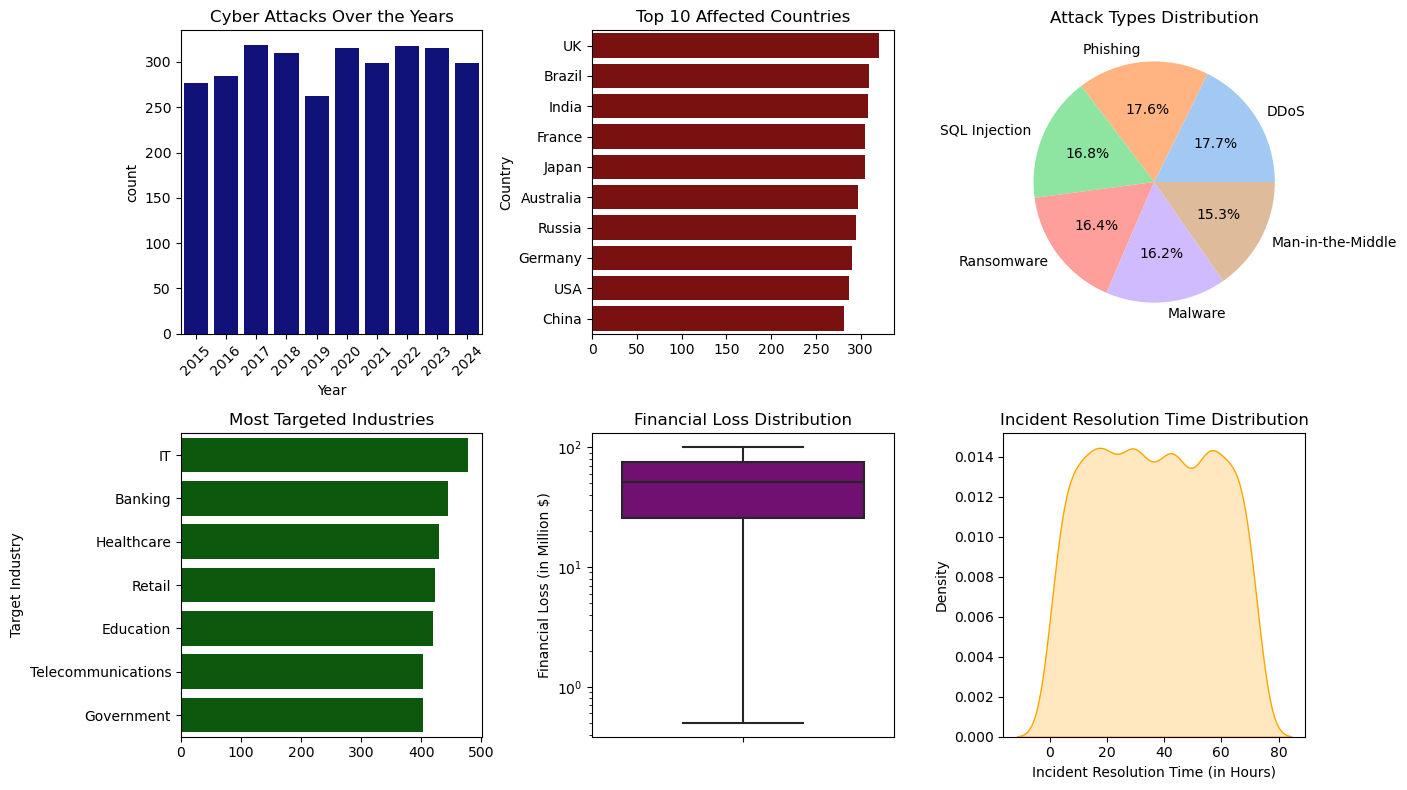

In [12]:


# Figure size
plt.figure(figsize=(14, 8))

# 1. Number of Attacks per Year
plt.subplot(2, 3, 1)
sns.countplot(data=df, x="Year", order=sorted(df["Year"].unique()), color="darkblue")
plt.xticks(rotation=45)
plt.title("Cyber Attacks Over the Years")

# 2. Top 10 Most Affected Countries
plt.subplot(2, 3, 2)
top_countries = df["Country"].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, color="darkred")
plt.title("Top 10 Affected Countries")

# 3. Attack Type Distribution
plt.subplot(2, 3, 3)
df["Attack Type"].value_counts().plot.pie(autopct="%1.1f%%", colors=sns.color_palette("pastel"))
plt.ylabel("")
plt.title("Attack Types Distribution")

# 4. Most Targeted Industries
plt.subplot(2, 3, 4)
top_industries = df["Target Industry"].value_counts().head(10)
sns.barplot(y=top_industries.index, x=top_industries.values, color="darkgreen")
plt.title("Most Targeted Industries")

# 5. Financial Loss Distribution (Boxplot)
plt.subplot(2, 3, 5)
sns.boxplot(data=df, y="Financial Loss (in Million $)", color="purple")
plt.yscale("log")
plt.title("Financial Loss Distribution")

# 6. Incident Resolution Time Analysis (KDE Plot)
plt.subplot(2, 3, 6)
sns.kdeplot(df["Incident Resolution Time (in Hours)"], fill=True, color="orange")
plt.title("Incident Resolution Time Distribution")

plt.tight_layout()
plt.show()

In [49]:
df["Year"].sort_values().unique()

array([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024],
      dtype=int64)

## 3. Какая взаимосвязь между типом защитного механизма и временем решения промлемы?

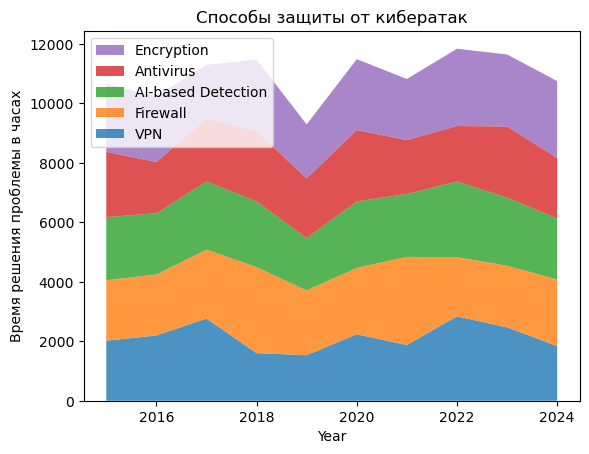

In [ ]:
countries = df.groupby(["Defense Mechanism Used", "Year"])["Incident Resolution Time (in Hours)"].sum()
year = df["Year"].sort_values().unique()
types_1 = df["Defense Mechanism Used"].unique()
values_1 = countries.values.reshape((5, 10))


fig, ax = plt.subplots()
ax.stackplot(year, values_1,
             labels=types_1, alpha=0.8)
ax.legend(loc='upper left', reverse=True)
ax.set_title('Способы защиты от кибератак')
ax.set_xlabel('Year')
ax.set_ylabel("Время решения проблемы в часах")
ax.set

plt.show()
plt.close()